In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate the environment
np.random.seed(42)

n_arms = 10  # Number of slot machines
true_means = np.random.rand(n_arms)  # True (hidden) reward probabilities for each arm

print("True means (hidden):", np.round(true_means, 3))


True means (hidden): [0.375 0.951 0.732 0.599 0.156 0.156 0.058 0.866 0.601 0.708]


In [2]:
def epsilon_greedy_bandit(true_means, epsilon=0.1, steps=1000):
    n_arms = len(true_means)
    Q = np.zeros(n_arms)   # Estimated value of each arm
    N = np.zeros(n_arms)   # Number of times each arm was chosen
    rewards = []

    for t in range(steps):
        # Decide whether to explore or exploit
        if np.random.rand() < epsilon:
            action = np.random.randint(n_arms)  # Explore
        else:
            action = np.argmax(Q)  # Exploit

        # Generate reward from the chosen arm
        reward = np.random.rand() < true_means[action]

        # Update estimates (incremental average)
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]
        rewards.append(reward)

    return np.array(rewards), Q


In [3]:
rewards, Q = epsilon_greedy_bandit(true_means, epsilon=0.1, steps=1000)

print("Estimated means:", np.round(Q, 3))
print("Best arm chosen:", np.argmax(Q))
print("Total reward:", np.sum(rewards))


Estimated means: [0.462 0.945 0.923 0.636 0.143 0.091 0.125 0.895 0.5   0.692]
Best arm chosen: 1
Total reward: 903


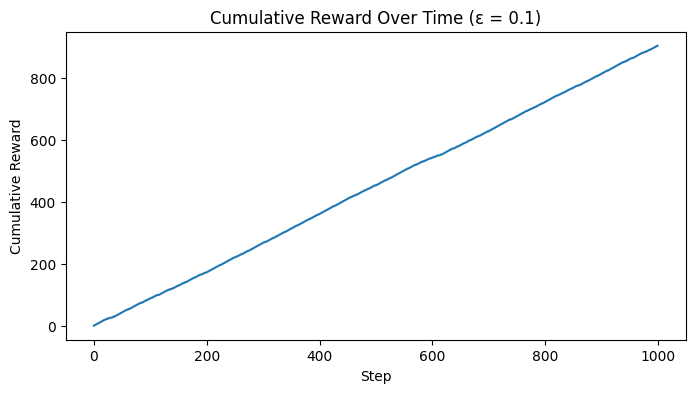

In [4]:
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(rewards))
plt.title("Cumulative Reward Over Time (ε = 0.1)")
plt.xlabel("Step")
plt.ylabel("Cumulative Reward")
plt.show()


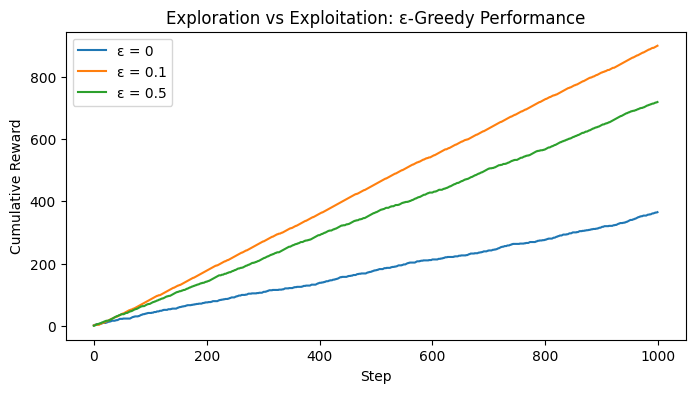

In [5]:
epsilons = [0, 0.1, 0.5]
steps = 1000
results = {}

for eps in epsilons:
    rewards, _ = epsilon_greedy_bandit(true_means, epsilon=eps, steps=steps)
    results[eps] = np.cumsum(rewards)

plt.figure(figsize=(8, 4))
for eps, rewards in results.items():
    plt.plot(rewards, label=f"ε = {eps}")
plt.legend()
plt.xlabel("Step")
plt.ylabel("Cumulative Reward")
plt.title("Exploration vs Exploitation: ε-Greedy Performance")
plt.show()


In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

#   __file__ with current path
base = Path(".").resolve()     
outdir = base / "prerequisite_MAB" / "figs"
outdir.mkdir(parents=True, exist_ok=True)

r1 = pd.read_csv(base / "submissions_round1.csv")
r2 = pd.read_csv(base / "submissions_round2.csv")

def parse_eps_from_details(s):
    if isinstance(s, str):
        m = re.search(r'fixed_eps\s*=\s*([0-9]*\.?[0-9]+)', s, re.IGNORECASE)
        if m:
            return float(m.group(1))
    return None

def parse_eps_alpha_from_strategy(s):
    eps = None; alpha = None
    if isinstance(s, str):
        m1 = re.search(r'eps\s*=\s*([0-9]*\.?[0-9]+)', s, re.IGNORECASE)
        m2 = re.search(r'alpha\s*=\s*([0-9]*\.?[0-9]+)', s, re.IGNORECASE)
        if m1: eps = float(m1.group(1))
        if m2: alpha = float(m2.group(1))
    return eps, alpha

# ---------- Round 1 ----------
r1["epsilon"] = r1["details"].apply(parse_eps_from_details)
fig1 = outdir / "round1_epsilon_vs_total_reward.png"
ax = r1.groupby("epsilon")["total_reward"].mean().sort_index().plot(kind="bar")
ax.set_xlabel("epsilon"); ax.set_ylabel("mean total_reward")
ax.set_title("Round 1 (Stationary): Mean total_reward by ε")
plt.tight_layout(); plt.savefig(fig1); plt.clf()

# ---------- Round 2 ----------
eps_alpha = r2["strategy"].apply(parse_eps_alpha_from_strategy)
r2["epsilon"] = [ea[0] for ea in eps_alpha]
r2["alpha"]   = [ea[1] for ea in eps_alpha]

fig2 = outdir / "round2_alpha_vs_total_reward.png"
ax = r2.groupby("alpha")["total_reward"].mean().sort_index().plot(kind="bar")
ax.set_xlabel("alpha"); ax.set_ylabel("mean total_reward")
ax.set_title("Round 2 (Non-Stationary): Mean total_reward by α")
plt.tight_layout(); plt.savefig(fig2); plt.clf()

fig2b = outdir / "round2_epsilon_vs_total_reward.png"
ax = r2.groupby("epsilon")["total_reward"].mean().sort_index().plot(kind="bar")
ax.set_xlabel("epsilon"); ax.set_ylabel("mean total_reward")
ax.set_title("Round 2 (Non-Stationary): Mean total_reward by ε")
plt.tight_layout(); plt.savefig(fig2b); plt.clf()

fig2c = outdir / "round2_eps_alpha_scatter.png"
plt.figure()
plt.scatter(r2["epsilon"], r2["alpha"], s=120, c=r2["total_reward"])
plt.xlabel("epsilon"); plt.ylabel("alpha")
plt.title("Round 2: ε vs α (color = total_reward)")
plt.tight_layout(); plt.savefig(fig2c); plt.clf()

print(" Figures saved under", outdir)


✅ Figures saved under C:\Users\baban\Desktop\AI&ML\SEM 2\Reinforcement learning\workshop\MultiArmedBandit_Workshop\prerequisite_MAB\prerequisite_MAB\figs


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>